<center>
    <b><font size="6",color='#00759c'>LAB 5: Probability</font></b>
 </center>
    
  <h2><center>
    Chouliaras Andreas 2143 achouliaras@inf.uth.gr <br>
    Giannoukos Triantafyllos-Anargyros 2232 tgiannoukos@inf.uth.gr <br>
    Matzoros Christos-Konstantinos 2169 cmatzoros@inf.uth.gr <br>
 </center></h2>

<center>
<b><font size="5",color='#00759c'>Getting Started</font></b>
</center>
<br>
Our investigation will focus on the performance of one player: Kobe Bryant of the Los Angeles Lakers. His performance against the Orlando Magic in the 2009 NBA finals earned him the title Most Valuable Player and many spectators commented on how he appeared to show a hot hand. Let’s load some data from those games and look at the first several rows.
    

In [1]:
download.file("http://www.openintro.org/stat/data/kobe.RData", destfile = "kobe.RData")
load("kobe.RData")
head(kobe)

vs,game,quarter,time,description,basket
ORL,1,1,9:47,Kobe Bryant makes 4-foot two point shot,H
ORL,1,1,9:07,Kobe Bryant misses jumper,M
ORL,1,1,8:11,Kobe Bryant misses 7-foot jumper,M
ORL,1,1,7:41,Kobe Bryant makes 16-foot jumper (Derek Fisher assists),H
ORL,1,1,7:03,Kobe Bryant makes driving layup,H
ORL,1,1,6:01,Kobe Bryant misses jumper,M


In this data frame, every row records a shot taken by Kobe Bryant. If he hit the shot (made a basket), a hit, H, is recorded in the column named basket, otherwise a miss, M, is recorded. For example, in Game 1 Kobe had the following sequence of hits and misses from his nine shot attempts in the first quarter:

H M | M | H H M | M | M | M

To verify this use the following command:

In [2]:
kobe$basket[1:9]

[1] "H" "M" "M" "H" "H" "M" "M" "M" "M"

Within the nine shot attempts, there are six streaks, which are separated by a “|” above. Their lengths are one, zero, two, zero, zero, zero (in order of occurrence).
\begin{exercise}
What does a streak length of 1 mean, i.e. how many hits and misses are in a streak of 1? What about a streak length of 0?
\end{exercise}


A streak length of one means that we have one consecutive hits before a miss. There is exactly one hit and one miss in a streak of one.<br>A streak length of zero means that we have no consecutive hits before a miss.

\begin{exercise}
Describe the distribution of Kobe’s streak lengths from the 2009 NBA finals. What was his typical streak length? How long was his longest streak of baskets?
\end{exercise}

The distribution of Kobe’s streak lengths seems to follow a geometric distribution because it represents the number of hits that occur before we get one miss.



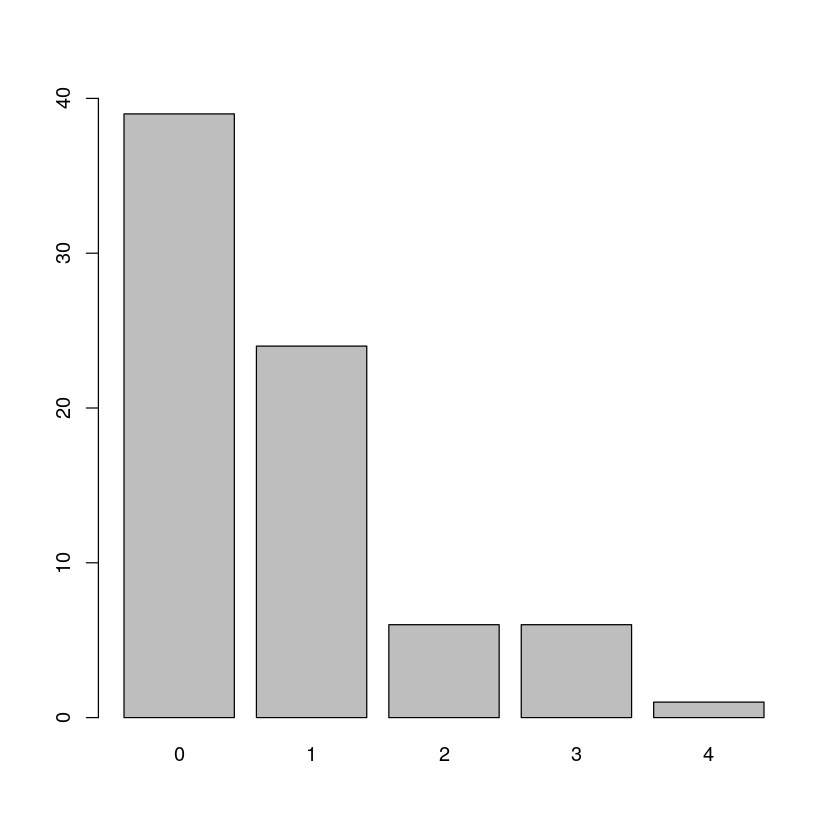

In [4]:
kobe_streak <- calc_streak(kobe$basket)
barplot(table(kobe_streak),ylim=c(0,40))

<center>
<b><font size="5",color='#00759c'>Compared to What?</font></b>
</center>
<br>
We’ve shown that Kobe had some long shooting streaks, but are they long enough to support the belief that he had hot hands? What can we compare them to?

To answer these questions, let’s return to the idea of independence. Two processes are independent if the outcome of one process doesn’t effect the outcome of the second. If each shot that a player takes is an independent process, having made or missed your first shot will not affect the probability that you will make or miss your second shot.

A shooter with a hot hand will have shots that are not independent of one another. Specifically, if the shooter makes his first shot, the hot hand model says he will have a higher probability of making his second shot.

Let’s suppose for a moment that the hot hand model is valid for Kobe. During his career, the percentage of time Kobe makes a basket (i.e. his shooting percentage) is about 45%, or in probability notation,

$$P(\text{shot 1} = H)=0.45$$

If he makes the first shot and has a hot hand (not independent shots), then the probability that he makes his second shot would go up to, let’s say, 60%,

$$P(\text{shot 2} = H|\text{shot 1} = H)=0.60$$

As a result of these increased probabilites, you’d expect Kobe to have longer streaks. Compare this to the skeptical perspective where Kobe does not have a hot hand, where each shot is independent of the next. If he hit his first shot, the probability that he makes the second is still 0.45.

$$P(\text{shot 2} = H|\text{shot 1} = H)=0.45$$

In other words, making the first shot did nothing to effect the probability that he’d make his second shot. If Kobe’s shots are independent, then he’d have the same probability of hitting every shot regardless of his past shots: 45%.

Now that we’ve phrased the situation in terms of independent shots, let’s return to the question: how do we tell if Kobe’s shooting streaks are long enough to indicate that he has hot hands? We can compare his streak lengths to someone without hot hands: an independent shooter.

<center>
<b><font size="5",color='#00759c'>Simulations in R</font></b>
</center>
<br>
While we don’t have any data from a shooter we know to have independent shots, that sort of data is very easy to simulate in R. In a simulation, you set the ground rules of a random process and then the computer uses random numbers to generate an outcome that adheres to those rules. As a simple example, you can simulate flipping a fair coin with the following.

In [4]:
outcomes <- c("heads", "tails")
sample(outcomes, size = 1, replace = TRUE)

[1] "tails"

The vector outcomes can be thought of as a hat with two slips of paper in it: one slip says heads and the other says tails. The function sample draws one slip from the hat and tells us if it was a head or a tail.

Run the second command listed above several times. Just like when flipping a coin, sometimes you’ll get a heads, sometimes you’ll get a tails, but in the long run, you’d expect to get roughly equal numbers of each.

If you wanted to simulate flipping a fair coin 100 times, you could either run the function 100 times or, more simply, adjust the size argument, which governs how many samples to draw (the replace = TRUE argument indicates we put the slip of paper back in the hat before drawing again). Save the resulting vector of heads and tails in a new object called sim_fair_coin.

In [5]:
sim_fair_coin <- sample(outcomes, size = 100, replace = TRUE)


To view the results of this simulation, type the name of the object and then use table to count up the number of heads and tails.

In [6]:
sim_fair_coin
table(sim_fair_coin)

[1] "heads" "heads" "tails" "tails" "tails" "tails" "heads" "heads" "tails"
 [10] "heads" "heads" "tails" "heads" "tails" "tails" "heads" "tails" "heads"
 [19] "tails" "heads" "tails" "tails" "tails" "tails" "heads" "heads" "tails"
 [28] "tails" "tails" "heads" "heads" "heads" "heads" "heads" "heads" "heads"
 [37] "tails" "heads" "heads" "tails" "tails" "tails" "tails" "heads" "heads"
 [46] "tails" "heads" "heads" "tails" "tails" "heads" "tails" "tails" "tails"
 [55] "heads" "tails" "heads" "heads" "heads" "heads" "heads" "tails" "tails"
 [64] "tails" "tails" "heads" "heads" "tails" "heads" "tails" "tails" "heads"
 [73] "tails" "heads" "tails" "tails" "heads" "tails" "heads" "heads" "heads"
 [82] "heads" "heads" "tails" "tails" "heads" "tails" "heads" "tails" "tails"
 [91] "heads" "tails" "tails" "heads" "heads" "tails" "heads" "heads" "heads"
[100] "tails"

sim_fair_coin
heads tails 
   51    49 

Since there are only two elements in outcomes, the probability that we “flip” a coin and it lands heads is 0.5. Say we’re trying to simulate an unfair coin that we know only lands heads 20% of the time. We can adjust for this by adding an argument called prob, which provides a vector of two probability weights.

In [7]:
sim_unfair_coin <- sample(outcomes, size = 100, replace = TRUE, prob = c(0.2, 0.8))
table(sim_unfair_coin)

sim_unfair_coin
heads tails 
   20    80 

$prob=c(0.2, 0.8)$ indicates that for the two elements in the outcomes vector, we want to select the first one, heads, with probability 0.2 and the second one, tails with probability 0.8. Another way of thinking about this is to think of the outcome space as a bag of 10 chips, where 2 chips are labeled “head” and 8 chips “tail”. Therefore at each draw, the probability of drawing a chip that says “head”" is 20%, and “tail” is 80%.


\begin{exercise}
In your simulation of flipping the unfair coin 100 times, how many flips came up heads?
\end{exercise}

In our simulation 18 flips came up heads. So heads came up near 20% of the times.


<center>
<b><font size="5",color='#00759c'>Simulating the Independent Shooter</font></b>
</center>
<br>
Simulating a basketball player who has independent shots uses the same mechanism that we use to simulate a coin flip. To simulate a single shot from an independent shooter with a shooting percentage of 50% we type,

In [8]:
outcomes <- c("H", "M")
sim_basket <- sample(outcomes, size = 1, replace = TRUE)

To make a valid comparison between Kobe and our simulated independent shooter, we need to align both their shooting percentage and the number of attempted shots.



\begin{exercise}
What change needs to be made to the sample function so that it reflects a shooting percentage of 45%? Make this adjustment, then run a simulation to sample 133 shots. Assign the output of this simulation to a new object called sim_basket.
\end{exercise}

We must define the probability of a Hit to 45% by running the following code: 




In [12]:
sim_basket <- sample(outcomes, size = 133, replace = TRUE,prob = c(0.45, 0.55))

Note that we’ve named the new vector sim_basket, the same name that we gave to the previous vector reflecting a shooting percentage of 50%. In this situation, R overwrites the old object with the new one, so always make sure that you don’t need the information in an old vector before reassigning its name.

With the results of the simulation saved as sim_basket, we have the data necessary to compare Kobe to our independent shooter. We can look at Kobe’s data alongside our simulated data.

In [13]:
kobe$basket
sim_basket
table(kobe$basket)
table(sim_basket)

[1] "H" "M" "M" "H" "H" "M" "M" "M" "M" "H" "H" "H" "M" "H" "H" "M" "M" "H"
 [19] "H" "H" "M" "M" "H" "M" "H" "H" "H" "M" "M" "M" "M" "M" "M" "H" "M" "H"
 [37] "M" "M" "H" "H" "H" "H" "M" "H" "M" "M" "H" "M" "M" "H" "M" "M" "H" "M"
 [55] "H" "H" "M" "M" "H" "M" "H" "H" "M" "H" "M" "M" "M" "H" "M" "M" "M" "M"
 [73] "H" "M" "H" "M" "M" "H" "M" "M" "H" "H" "M" "M" "M" "M" "H" "H" "H" "M"
 [91] "M" "H" "M" "M" "H" "M" "H" "H" "M" "H" "M" "M" "H" "M" "M" "M" "H" "M"
[109] "H" "H" "H" "M" "H" "H" "H" "M" "H" "M" "H" "M" "M" "M" "M" "M" "M" "H"
[127] "M" "H" "M" "M" "M" "M" "H"

[1] "M" "M" "M" "H" "H" "M" "M" "H" "H" "H" "H" "M" "H" "M" "M" "M" "M" "H"
 [19] "H" "H" "H" "M" "M" "H" "M" "H" "H" "H" "M" "H" "M" "H" "H" "H" "H" "M"
 [37] "M" "M" "M" "M" "M" "M" "H" "M" "M" "M" "M" "H" "M" "H" "M" "M" "H" "H"
 [55] "H" "M" "M" "M" "H" "M" "H" "H" "M" "H" "H" "H" "H" "M" "H" "M" "M" "H"
 [73] "M" "H" "M" "M" "M" "H" "M" "M" "H" "H" "H" "H" "M" "M" "M" "H" "M" "H"
 [91] "M" "M" "H" "M" "M" "M" "M" "H" "H" "M" "M" "H" "M" "M" "M" "H" "M" "M"
[109] "M" "M" "M" "M" "M" "M" "M" "H" "H" "M" "M" "H" "H" "H" "H" "M" "H" "H"
[127] "M" "M" "H" "H" "H" "M" "M"


 H  M 
58 75 

sim_basket
 H  M 
59 74 

Both data sets represent the results of 133 shot attempts, each with the same shooting percentage of 45%. We know that our simulated data is from a shooter that has independent shots. That is, we know the simulated shooter does not have a hot hand

<center>
<b><font size="5",color='#00759c'>On your own</font></b>
</center>
<br>
<font size="4",color='#00759c'>Comparing Kobe Bryant to the Independent Shooter</font>
<br>
Using calc_streak, compute the streak lengths of sim_basket.

1. Describe the distribution of streak lengths. What is the typical streak length for this simulated independent shooter with a 45% shooting percentage? How long is the player’s longest streak of baskets in 133 shots?


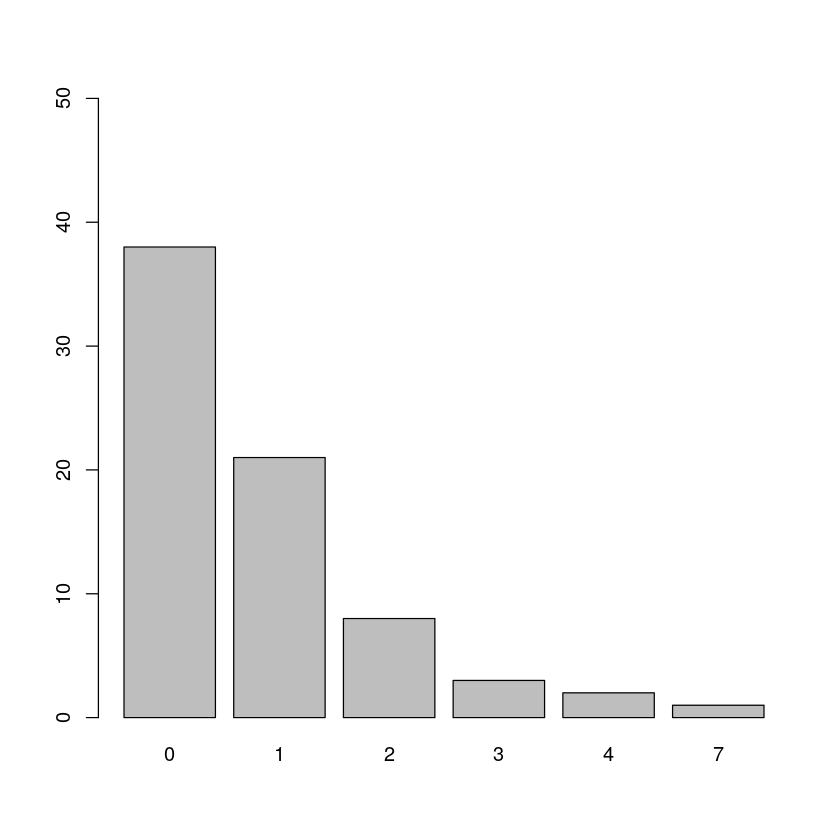

In [11]:
simulation_streak <- calc_streak(sim_basket)
barplot(table(simulation_streak),ylim=c(0,50))

The distribution of the simulated independent shooter streak lengths seems to follow a geometric distribution because it represents the number of hits that occur before we get one miss. <br>
The typical streak length for this simulated independent shooter is zero.<br>
The player’s longest streak of baskets in 133 shots is 7.


2. If you were to run the simulation of the independent shooter a second time, how would you expect its streak distribution to compare to the distribution from the question above? Exactly the same? Somewhat similar? Totally different? Explain your reasoning.

We expect the streak distribution of the independent shooter to be somewhat similar to our previous experiment.
It is highly unlikely to get exactly identical results as the sampling function randomly selects instances.
Due to this randomness we expect to get similar results.

3. How does Kobe Bryant’s distribution of streak lengths compare to the distribution of streak lengths for the simulated shooter? Using this comparison, do you have evidence that the hot hand model fits Kobe’s shooting patterns? Explain.

We see that the two distributions are similar. This means that the hot hand model doesn't fits Kobe’s shooting patterns. It follows the distribution of the independent shooter from the simulation. 